In [15]:
import pandas as pd
assert(pd)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [17]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np

In [20]:
from plug_mongo import get_entries
get_entries()[0]

{'_id': ObjectId('6367c9850942d09e74045c2e'),
 'game_id': 548809662,
 'timestamp': datetime.datetime(2022, 11, 6, 11, 49, 41, 232000),
 'label': 0,
 'player_0_w': 216,
 'player_0_l': 181,
 'player_0_co_w': 145,
 'player_0_co_l': 91,
 'player_0_ct_wr': 0.5354,
 'player_1_w': 174,
 'player_1_l': 147,
 'player_1_co_w': 8,
 'player_1_co_l': 3,
 'player_1_ct_wr': 0.4962,
 'player_2_w': 105,
 'player_2_l': 64,
 'player_2_co_w': 14,
 'player_2_co_l': 3,
 'player_2_ct_wr': 0.494,
 'player_3_w': 215,
 'player_3_l': 185,
 'player_3_co_w': 13,
 'player_3_co_l': 14,
 'player_3_ct_wr': 0.5084000000000001,
 'player_4_w': 238,
 'player_4_l': 208,
 'player_4_co_w': 6,
 'player_4_co_l': 2,
 'player_4_ct_wr': 0.5264,
 'player_5_w': 499,
 'player_5_l': 458,
 'player_5_co_w': 0,
 'player_5_co_l': 0,
 'player_5_ct_wr': 0.5023,
 'player_6_w': 288,
 'player_6_l': 262,
 'player_6_co_w': 110,
 'player_6_co_l': 78,
 'player_6_ct_wr': 0.5008,
 'player_7_w': 89,
 'player_7_l': 54,
 'player_7_co_w': 3,
 'player_7_

In [21]:
df = pd.DataFrame(get_entries()).drop("_id", axis=1).set_index("game_id")
df.head()

,timestamp,label,player_0_w,player_0_l,player_0_co_w,player_0_co_l,player_0_ct_wr,player_1_w,player_1_l,player_1_co_w,...,player_8_w,player_8_l,player_8_co_w,player_8_co_l,player_8_ct_wr,player_9_w,player_9_l,player_9_co_w,player_9_co_l,player_9_ct_wr
game_id,,,,,,,,,,,,,,,,,,,,,
548809662,2022-11-06 11:49:41.232,0,216,181,145,91,0.5354,174,147,8,...,297,284,1,0,0.5003,941,930,43,35,0.5093
4484824702,2022-11-06 12:05:50.491,0,541,503,27,28,0.5161,160,111,0,...,269,202,9,3,0.4971,988,954,65,78,0.4948
548810655,2022-11-06 12:28:24.061,1,155,146,20,6,0.4879,55,46,0,...,186,144,22,23,0.5088,55,45,0,1,0.5229
6140028214,2022-11-06 12:30:18.186,1,686,645,43,41,0.5082,368,281,17,...,234,198,25,32,0.5197,2090,2035,390,340,0.5306
1351099000,2022-11-06 13:18:07.163,1,31,14,23,8,0.5043,38,12,2,...,17,6,8,3,0.5148,125,103,0,0,0.4933


In [22]:
df.count()

timestamp         18307
label             18307
player_0_w        18307
player_0_l        18307
player_0_co_w     18307
player_0_co_l     18307
player_0_ct_wr    18307
player_1_w        18307
player_1_l        18307
player_1_co_w     18307
player_1_co_l     18307
player_1_ct_wr    18307
player_2_w        18307
player_2_l        18307
player_2_co_w     18307
player_2_co_l     18307
player_2_ct_wr    18307
player_3_w        18307
player_3_l        18307
player_3_co_w     18307
player_3_co_l     18307
player_3_ct_wr    18307
player_4_w        18307
player_4_l        18307
player_4_co_w     18307
player_4_co_l     18307
player_4_ct_wr    18307
player_5_w        18307
player_5_l        18307
player_5_co_w     18307
player_5_co_l     18307
player_5_ct_wr    18307
player_6_w        18307
player_6_l        18307
player_6_co_w     18307
player_6_co_l     18307
player_6_ct_wr    18307
player_7_w        18307
player_7_l        18307
player_7_co_w     18307
player_7_co_l     18307
player_7_ct_wr  

In [23]:
df['label'].mean()

0.5190910580652209

In [24]:
def add_one(column):
	return df[column].apply(lambda x: x+1)

def get_winrate(column):
	win = add_one(column+'_w')
	los = add_one(column+'_l')
	return win / (win + los)

get_winrate('player_0')

game_id
548809662     0.543860
4484824702    0.518164
548810655     0.514851
6140028214    0.515379
1351099000    0.680851
                ...   
6164625063    0.518578
6164632465    0.502994
550997567     0.610294
3262382189    0.511111
6232171323    0.604072
Length: 18307, dtype: float64

In [25]:
def get_winrates(i):
	i = 'player_' + str(i)
	return [
		get_winrate(i),
		get_winrate(i+'_co'),
		df[i+'_ct_wr']
	]

def get_winrates_diff(i, name):
	j = i + 5
	results = get_winrates(i), get_winrates(j)
	return [
		(results[0][0] - results[1][0]).rename(name + "_wrd"),
		(results[0][1] - results[1][1]).rename(name + "_co_wrd"),
		(results[0][2] - results[1][2]).rename(name + "_ct_wrd")
	]

results = [df['label']]

lanes = ((0, "top"), (0, "jun"), (0, "mid"), (0, "bot"), (0, "sup"))
for x in lanes:
	results.extend(get_winrates_diff(*x)) 
df_winrates = pd.concat(results, axis=1).fillna(0.5)
df_winrates.head()

,label,top_wrd,top_co_wrd,top_ct_wrd,jun_wrd,jun_co_wrd,jun_ct_wrd,mid_wrd,mid_co_wrd,mid_ct_wrd,bot_wrd,bot_co_wrd,bot_ct_wrd,sup_wrd,sup_co_wrd,sup_ct_wrd
game_id,,,,,,,,,,,,,,,,
548809662,0,0.022483,0.113445,0.0331,0.022483,0.113445,0.0331,0.022483,0.113445,0.0331,0.022483,0.113445,0.0331,0.022483,0.113445,0.0331
4484824702,0,0.004255,0.062657,0.0063,0.004255,0.062657,0.0063,0.004255,0.062657,0.0063,0.004255,0.062657,0.0063,0.004255,0.062657,0.0063
548810655,1,-0.119477,0.250000,0.0836,-0.119477,0.250000,0.0836,-0.119477,0.250000,0.0836,-0.119477,0.250000,0.0836,-0.119477,0.250000,0.0836
6140028214,1,-0.020538,-0.131229,0.0067,-0.020538,-0.131229,0.0067,-0.020538,-0.131229,0.0067,-0.020538,-0.131229,0.0067,-0.020538,-0.131229,0.0067
1351099000,1,0.115634,0.195804,0.0207,0.115634,0.195804,0.0207,0.115634,0.195804,0.0207,0.115634,0.195804,0.0207,0.115634,0.195804,0.0207


In [26]:
train_dataset = df_winrates.sample(frac=0.8, random_state=0)
test_dataset = df_winrates.drop(train_dataset.index)
train_dataset.head()

,label,top_wrd,top_co_wrd,top_ct_wrd,jun_wrd,jun_co_wrd,jun_ct_wrd,mid_wrd,mid_co_wrd,mid_ct_wrd,bot_wrd,bot_co_wrd,bot_ct_wrd,sup_wrd,sup_co_wrd,sup_ct_wrd
game_id,,,,,,,,,,,,,,,,
3252704800,0,-0.103482,0.005115,0.0163,-0.103482,0.005115,0.0163,-0.103482,0.005115,0.0163,-0.103482,0.005115,0.0163,-0.103482,0.005115,0.0163
4488699054,0,-0.006704,-0.258401,0.0171,-0.006704,-0.258401,0.0171,-0.006704,-0.258401,0.0171,-0.006704,-0.258401,0.0171,-0.006704,-0.258401,0.0171
3254899506,0,-0.072257,-0.133929,0.0793,-0.072257,-0.133929,0.0793,-0.072257,-0.133929,0.0793,-0.072257,-0.133929,0.0793,-0.072257,-0.133929,0.0793
6145685471,0,0.053791,0.083056,0.0012,0.053791,0.083056,0.0012,0.053791,0.083056,0.0012,0.053791,0.083056,0.0012,0.053791,0.083056,0.0012
1237727628,0,-0.038497,-0.198052,-0.0245,-0.038497,-0.198052,-0.0245,-0.038497,-0.198052,-0.0245,-0.038497,-0.198052,-0.0245,-0.038497,-0.198052,-0.0245


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

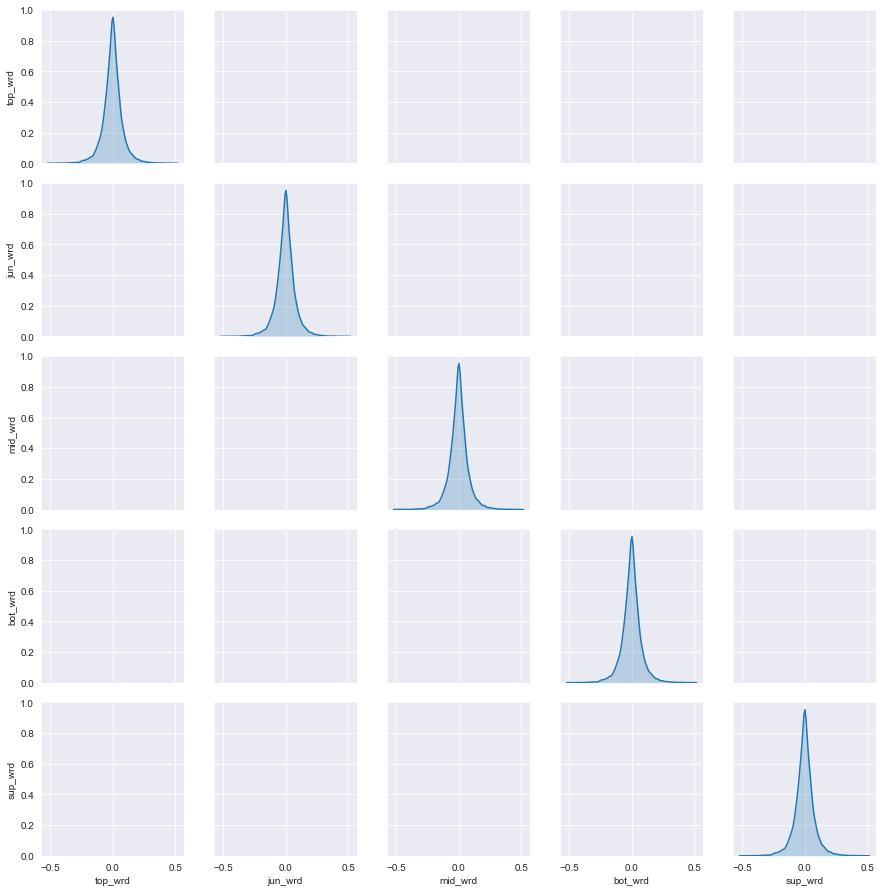

In [27]:
sns.pairplot(train_dataset[[f'{x[1]}_wrd' for x in lanes]], diag_kind='kde')

In [28]:
train_dataset.describe().transpose()


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [29]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('label')
test_labels = test_features.pop('label')
train_labels.head()

game_id
3252704800    0
4488699054    0
3254899506    0
6145685471    0
1237727628    0
Name: label, dtype: int64

In [30]:
mid_wrd = np.array(train_features['mid_wrd'])
mid_wrd_normalization = layers.Normalization(input_shape=[1,], axis=None)
mid_wrd_normalization.adapt(mid_wrd)
mid_wrd_model = keras.Sequential([
    mid_wrd_normalization,
    layers.Dense(units=1)
])

mid_wrd_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [31]:
mid_wrd_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [48]:
history = mid_wrd_model.fit(
    mid_wrd,
    train_labels,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


In [49]:
mid_wrd_model.layers[1].kernel[0][0].numpy()

-0.11270373

In [50]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
995,0.496285,0.489604,995
996,0.493927,0.498931,996
997,0.492666,0.492693,997
998,0.493488,0.503119,998
999,0.497464,0.494117,999


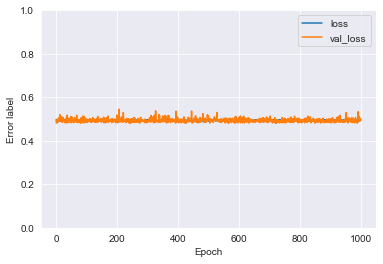

In [51]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error label')
  plt.legend()
  plt.grid(True)
plot_loss(history)


In [52]:
x = tf.linspace(-1, 1, 251)
y = mid_wrd_model.predict(x)
y

8/8 [==============================] - 0s 2ms/step


array([[ 2.1507173 ],
       [ 2.1388733 ],
       [ 2.1270294 ],
       [ 2.1151857 ],
       [ 2.1033416 ],
       [ 2.0914977 ],
       [ 2.0796537 ],
       [ 2.06781   ],
       [ 2.055966  ],
       [ 2.0441222 ],
       [ 2.032278  ],
       [ 2.0204344 ],
       [ 2.0085902 ],
       [ 1.9967465 ],
       [ 1.9849025 ],
       [ 1.9730586 ],
       [ 1.9612147 ],
       [ 1.9493709 ],
       [ 1.9375268 ],
       [ 1.9256829 ],
       [ 1.913839  ],
       [ 1.9019952 ],
       [ 1.8901513 ],
       [ 1.8783072 ],
       [ 1.8664634 ],
       [ 1.8546195 ],
       [ 1.8427756 ],
       [ 1.8309315 ],
       [ 1.8190877 ],
       [ 1.8072438 ],
       [ 1.7953999 ],
       [ 1.783556  ],
       [ 1.771712  ],
       [ 1.759868  ],
       [ 1.7480242 ],
       [ 1.7361803 ],
       [ 1.7243363 ],
       [ 1.7124923 ],
       [ 1.7006484 ],
       [ 1.6888046 ],
       [ 1.6769607 ],
       [ 1.6651168 ],
       [ 1.6532727 ],
       [ 1.641429  ],
       [ 1.629585  ],
       [ 1

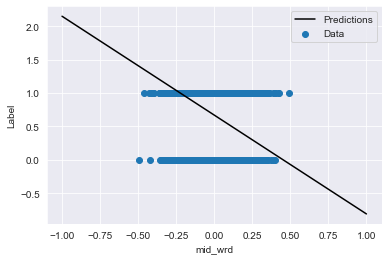

In [53]:
def plot_param(x, y, column):
  plt.scatter(train_features[column], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('mid_wrd')
  plt.ylabel('Label')
  plt.legend()

plot_param(x, y, 'mid_wrd')


In [37]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_features)
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [38]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [39]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

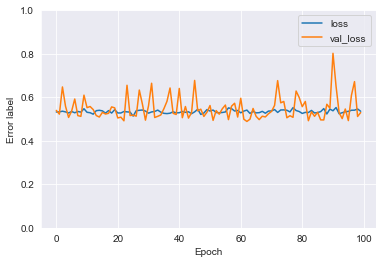

In [40]:
plot_loss(history)


In [41]:
weights = linear_model.layers[1].kernel
labels = train_features.columns
[(weights[x][0].numpy(), labels[x]) for x in range(15)]

[(-0.19111511, 'top_wrd'),
 (-0.4315472, 'top_co_wrd'),
 (0.19369565, 'top_ct_wrd'),
 (-0.4097196, 'jun_wrd'),
 (0.1968428, 'jun_co_wrd'),
 (-0.23644106, 'jun_ct_wrd'),
 (0.15549207, 'mid_wrd'),
 (-0.4038811, 'mid_co_wrd'),
 (0.2709165, 'mid_ct_wrd'),
 (0.08777544, 'bot_wrd'),
 (0.40825808, 'bot_co_wrd'),
 (-0.137553, 'bot_ct_wrd'),
 (0.46744752, 'sup_wrd'),
 (0.5236624, 'sup_co_wrd'),
 (-0.105834834, 'sup_ct_wrd')]

In [42]:
bot_wrd = np.array(train_features['bot_wrd'])
bot_wrd_normalization = layers.Normalization(input_shape=[1, ], axis=None)
bot_wrd_normalization.adapt(bot_wrd)
bot_wrd_model = keras.Sequential([
    bot_wrd_normalization,
    layers.Dense(units=1)
])

bot_wrd_model.summary()

bot_wrd_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
